In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('loansData.csv')

In [4]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [6]:
df['Loan.Length'][0:10]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
62403    36 months
48808    36 months
22090    60 months
76404    36 months
15867    36 months
Name: Loan.Length, dtype: object

In [7]:
df['Interest.Rate'][0:10]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
62403    15.31%
48808     7.90%
22090    17.14%
76404    14.33%
15867     6.91%
Name: Interest.Rate, dtype: object

In [8]:
df['FICO.Range'][0:10]

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
62403    670-674
48808    720-724
22090    705-709
76404    685-689
15867    715-719
Name: FICO.Range, dtype: object

In [3]:
#convert range into strings theb pass that string "735-739" into {715-739}
loan = pd.read_csv('loan.csv')

In [5]:
loan.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


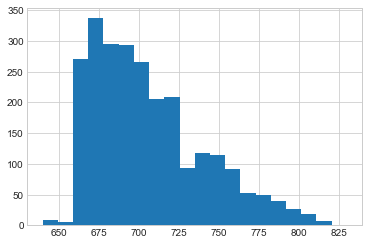

In [11]:
plt.figure()
fico=loan['FICO.Score']
fico.hist(bins=20)

C:\Users\farheen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'interest rate in %')

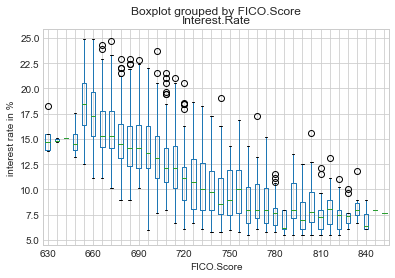

In [19]:
plt.figure()
box=loan.boxplot('Interest.Rate','FICO.Score')
box.set_xticklabels(['630','','','','','660','','','','','690','','','','','720','','','','','750','','','','','780','','','','',
                     '810','','','','','840'])
box.set_xlabel('FICO.Score')
box.set_ylabel('interest rate in %')
#set_title

C:\Users\farheen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A0B1B8C748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000A0B20C3EF0>]], dtype=object)

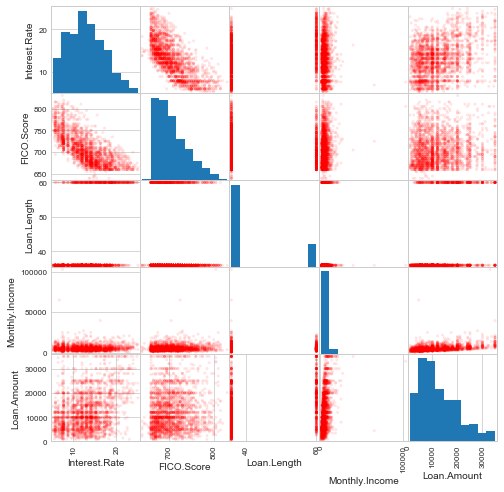

In [23]:
#scatterplot matrix
pd.scatter_matrix(loan,alpha= 0.1,figsize=(8,8),color='red',diagonal='hist') # alpha that is for transparency

#it allows us to compare the effect of each individual variable to each other and to the other variables

In [24]:
# in fico score and interest there is very linear relationship i.e, a person's fico score is an imp factor in interst rate
#loan amt and interst rate has some linear relationship also influences
#monthly income and int rate no LR also loan len
#independent var: fico score and loan amt
#dependent variable:interest rate

In [25]:
#Analysis

In [27]:
#we found that our interest rate variance depends on  loan amnt and fico score 

#MULTIVARIATE LINEAR REGRESSION    more than one variable  affects our interst rate 

In [29]:
#for statistical analysis
import statsmodels.api as sm


C:\Users\farheen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
dframe = pd.read_csv('loan.csv')

In [33]:
int_rate=dframe['Interest.Rate']
loan_amt =dframe['Loan.Amount']
fico_score=dframe['FICO.Score']
int_rate

6       15.31
11      19.72
12      14.27
13      21.67
21      21.98
23      17.99
25      16.82
40      12.49
41      17.27
43      19.13
44      21.74
48      23.91
52      17.44
54      21.49
57      12.98
64      15.80
74      17.27
75      15.31
76      13.12
79      17.77
91      16.29
93      15.81
99      19.72
100     18.75
114     13.99
132     16.32
136     16.40
142     23.28
147     17.27
151     21.49
        ...  
2348     6.62
2349     6.99
2359     6.62
2362     7.62
2366    10.37
2375     7.51
2385     7.29
2386    11.83
2389     6.03
2396     7.88
2397    14.09
2399     8.94
2400    13.99
2410     6.99
2411     6.03
2413    10.99
2422     5.79
2429    13.49
2438     9.88
2445     6.62
2447     8.90
2453     7.90
2454    10.16
2466     6.03
2470    10.74
2472     7.90
2481     6.03
2482     6.62
2486    10.75
2497    14.09
Name: Interest.Rate, Length: 2500, dtype: float64

In [37]:
#reshape the data from panda series to colums
y=np.matrix(int_rate).transpose() #dependent var transpose
x1=np.matrix(loan_amt).transpose() #independent var transpose
x2= np.matrix(fico_score).transpose() #independent var transpose
y

matrix([[ 15.31],
        [ 19.72],
        [ 14.27],
        ..., 
        [  6.62],
        [ 10.75],
        [ 14.09]])

In [38]:
#for input matrix for indep var
#it takes 1d array created a single 2d array and stack them as columns
x=np.column_stack([x1,x2])
x

matrix([[ 6000,   670],
        [ 2000,   670],
        [10625,   665],
        ..., 
        [27000,   810],
        [25000,   765],
        [16000,   740]], dtype=int64)

In [39]:
x3 =sm.add_constant(x)#add the column to the input dataset

In [40]:
x3

matrix([[  1.00000000e+00,   6.00000000e+03,   6.70000000e+02],
        [  1.00000000e+00,   2.00000000e+03,   6.70000000e+02],
        [  1.00000000e+00,   1.06250000e+04,   6.65000000e+02],
        ..., 
        [  1.00000000e+00,   2.70000000e+04,   8.10000000e+02],
        [  1.00000000e+00,   2.50000000e+04,   7.65000000e+02],
        [  1.00000000e+00,   1.60000000e+04,   7.40000000e+02]])

In [41]:
#ordinary least square it takes to 2 array objects like a df or array and then it helps us to perform the regression of the predictor in the response
#OLS predictors are x3 and y 
#responses are y 

In [42]:
model=sm.OLS(y,x3)

In [43]:
model_fit=model.fit()

In [44]:
#we have p-value and r squared method


In [47]:
print("the P values are " , model_fit.pvalues) #we want values to be below 5% ,0-0.05 then our model is good

print('the R-squared values are ' , model_fit.rsquared)

# this rsquared value is called coefficient of determination and it tells us how will the regression line approximates the real data points.
#rsquare lies bet -1 and 1 . a gud value is if it is close to 1 

the P values are  [  0.00000000e+000   5.96972978e-203   0.00000000e+000]
the R-squared values are  0.656632624649


In [ ]:
# the int rate is influence by both fico score and loan amnt